# Assignment 1
## Problem 1 - System Identification

In [5]:
%reload_ext autoreload
%autoreload 2

import sys
SRC_PATH = ["/Users/thomas/Code/22w_nlsp", "/home/fritz/Documents/NLSP/nlsp_ue/"]

if any(map(lambda p: p not in sys.path, SRC_PATH)):
    sys.path.extend(SRC_PATH)
    

import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

from src.models.mls_models import PolynomialModel, RBFModel
from src.utils.plotting import init_plot_style
# %pylab

init_plot_style()
data_dir='../../data/csv/1_1_system_identification/'

First, let's take a look at the training and test data.

Fit and evaluate a polynomial model of varying order.

Compare the best train and test models.

Number of train samples is 25.
Number of test samples is 25.


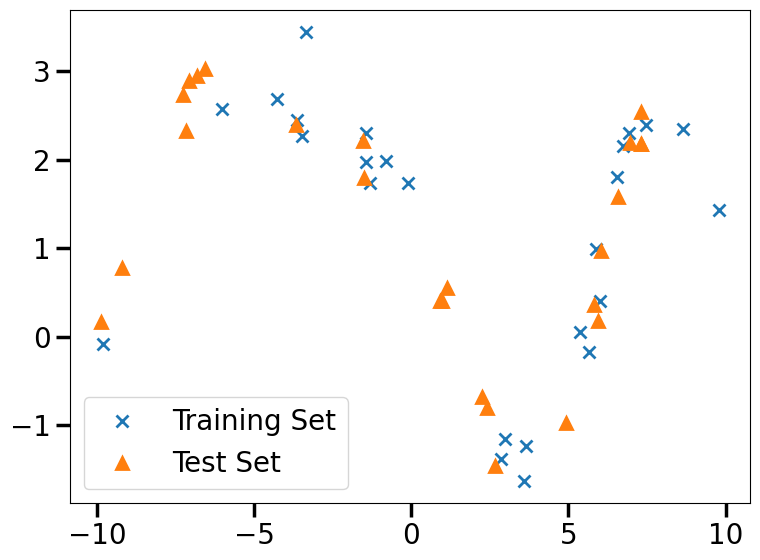

In [6]:
train_data = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
x_train, y_train = train_data[:,0], train_data[:,1]
print(f'Number of train samples is {len(x_train)}.')

test_data = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_data[:,0], test_data[:,1]
print(f'Number of test samples is {len(x_test)}.')

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.legend()
plt.tight_layout()


Best train model has order 15 with train/test MSE is 0.0222983605919732 / 1355.3183173311998.
Best test model has order 8 with train/test MSE is 0.07761171182474896 / 0.15745334373121594.


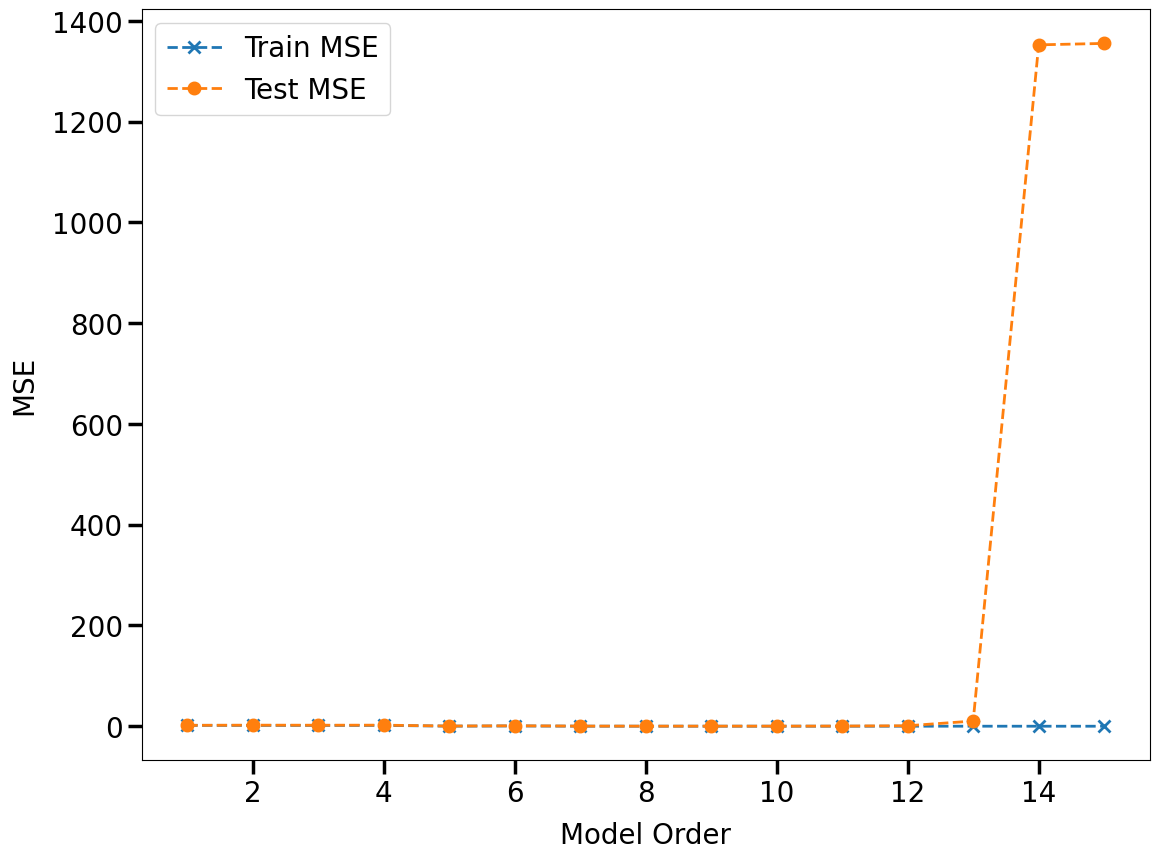

In [28]:
max_order = 15
model_class = RBFModel

train_mse_list = []
test_mse_list = []
for order in range(1, max_order+1):
    model = model_class(order)
    train_mse_list.append(model.fit(x_train, y_train))
    test_mse = np.mean((model.predict(x_test) - y_test)**2)
    test_mse_list.append(test_mse)

best_train_order = np.argmin(np.array(train_mse_list)) + 1
print(f'Best train model has order {best_train_order} with train/test MSE is {train_mse_list[best_train_order-1]} / {test_mse_list[best_train_order-1]}.')

best_test_order = np.argmin(np.array(test_mse_list)) + 1
print(f'Best test model has order {best_test_order} with train/test MSE is {train_mse_list[best_test_order-1]} / {test_mse_list[best_test_order-1]}.')

plt.close('all')
plt.figure()
plt.plot(list(range(1,max_order+1)), train_mse_list, 'x--', label='Train MSE')
plt.plot(list(range(1,max_order+1)), test_mse_list, 'o--', label='Test MSE')
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()
plt.savefig(f"{str(model)}_mse_order_{max_order}.png", format='png')

In [22]:
str(model_class)

"<class 'src.models.mls_models.RBFModel'>"

Number of train samples is 18.
Number of validation samples is 7.
Number of test samples is 25.


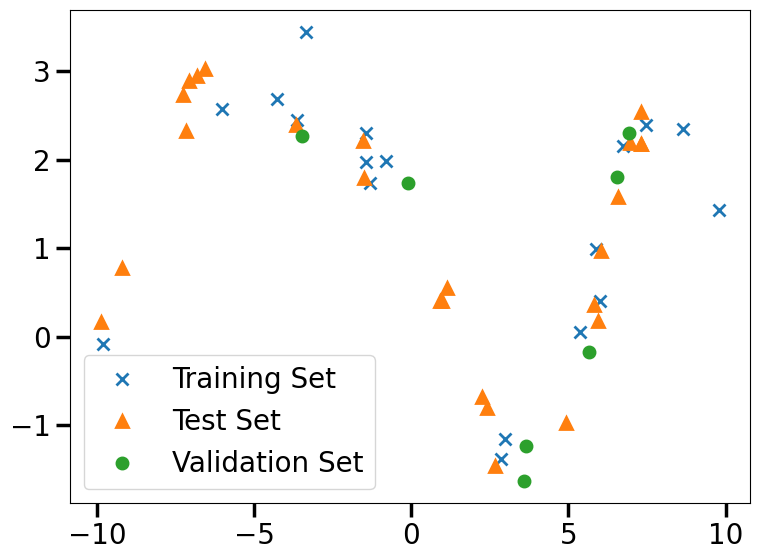

In [19]:
train_data = pd.read_csv(data_dir + 'training-set.csv').to_numpy()
np.random.shuffle(train_data)
np.random.seed(100)
split = round(0.7*np.shape(train_data)[0])
x_train, y_train = train_data[0:split,0], train_data[0:split,1]
x_val, y_val = train_data[split::,0], train_data[split::,1]
print(f'Number of train samples is {len(x_train)}.')
print(f'Number of validation samples is {len(x_val)}.')

test_data = pd.read_csv(data_dir + 'test-set.csv').to_numpy()
x_test, y_test = test_data[:,0], test_data[:,1]
print(f'Number of test samples is {len(x_test)}.')

plt.close('all')
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'x', label='Training Set')
plt.plot(x_test, y_test, '^', label='Test Set')
plt.plot(x_val, y_val, 'o', label='Validation Set')
plt.legend()
plt.tight_layout()
plt.show()

Best train model has order 15 with train/validation MSE is 0.0222983605919732 / 1.7806548682352676.
Best test model has order 9 with train/validation MSE is 0.07179637473948271 / 0.14635797359183295.


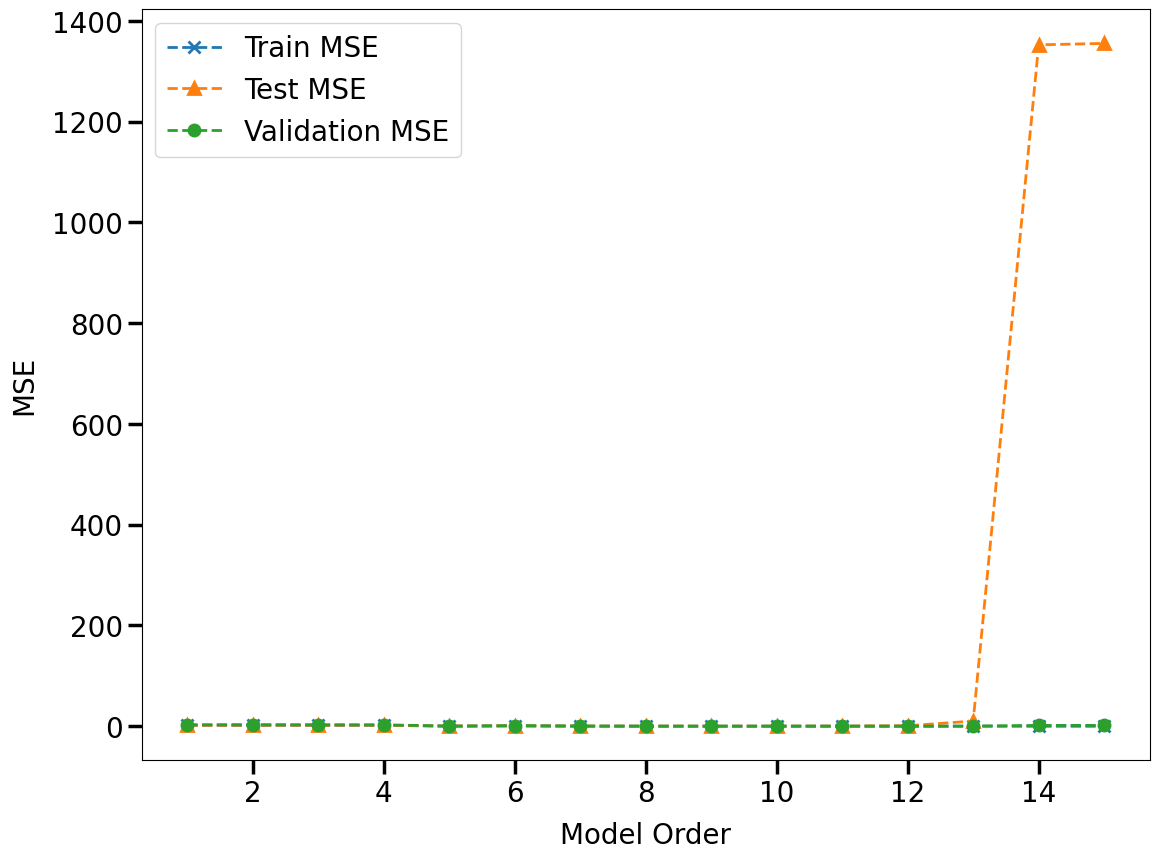

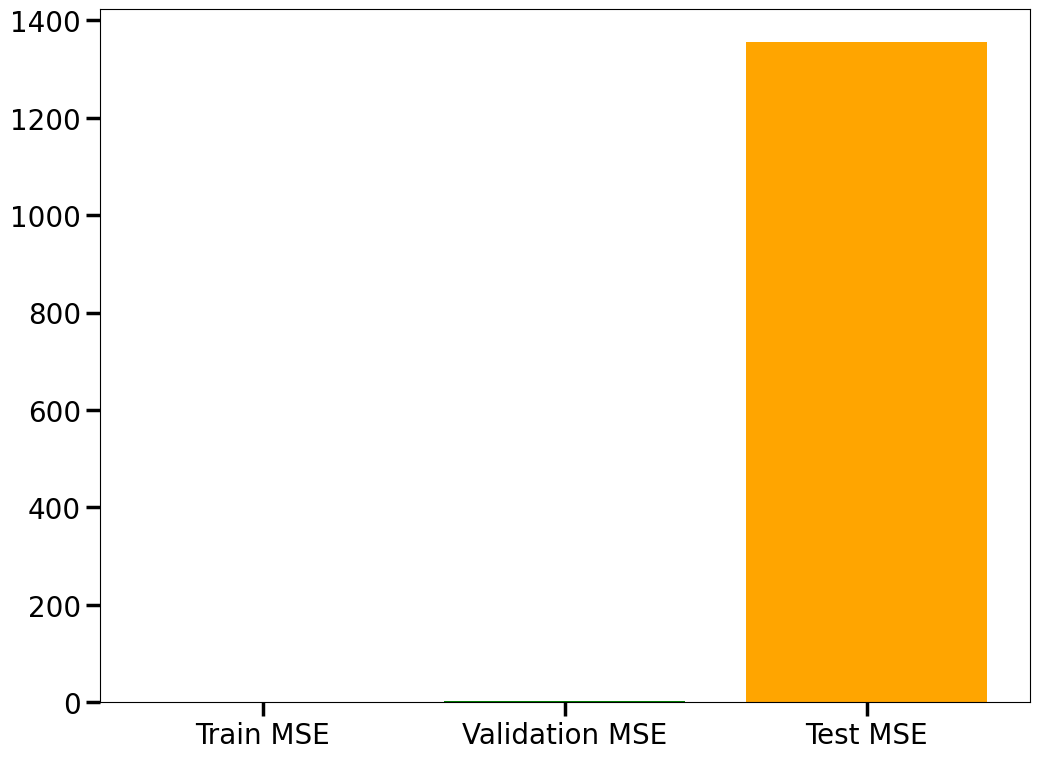

[3.0066444699114183,
 3.1504120361910615,
 3.0215522953617535,
 2.86506622705275,
 0.1868285486030414,
 1.21552209478878,
 0.4136730174851263,
 0.22284448401866536,
 0.14635797359183295,
 0.19782605373270543,
 0.17219928038785723,
 0.15597650044834963,
 0.354176666359264,
 1.6165038503647813,
 1.7806548682352676]

In [37]:
max_order = 15
model_class = RBFModel

train_mse_list = []
test_mse_list = []
validation_mse_list = []
for order in range(1, max_order+1):
    model = model_class(order)
    train_mse_list.append(model.fit(x_train, y_train))
    validation_mse = np.mean((model.predict(x_val) - y_val)**2)
    validation_mse_list.append(validation_mse)
    test_mse = np.mean((model.predict(x_test) - y_test)**2)
    test_mse_list.append(test_mse)

best_train_order = np.argmin(np.array(train_mse_list)) + 1
print(f'Best train model has order {best_train_order} with train/validation MSE is {train_mse_list[best_train_order-1]} / {validation_mse_list[best_train_order-1]}.')

best_validation_order = np.argmin(np.array(validation_mse_list)) + 1
print(f'Best test model has order {best_validation_order} with train/validation MSE is {train_mse_list[best_validation_order-1]} / {validation_mse_list[best_validation_order-1]}.')

plt.close('all')
plt.figure()
plt.plot(list(range(1,max_order+1)), train_mse_list, 'x--', label='Train MSE')
plt.plot(list(range(1,max_order+1)), test_mse_list, '^--', label='Test MSE')
plt.plot(list(range(1,max_order+1)), validation_mse_list, 'o--', label='Validation MSE')
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig(f"{str(model)}_mse_order_with_val_{max_order}.png", format='png')
plt.show()
plt.figure()
# create a dataset
height = [train_mse_list[best_train_order-1], validation_mse_list[best_train_order-1], test_mse_list[best_train_order-1]]
bars = ("Train MSE", "Validation MSE", "Test MSE")
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['blue', 'green', 'orange'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()
validation_mse_list

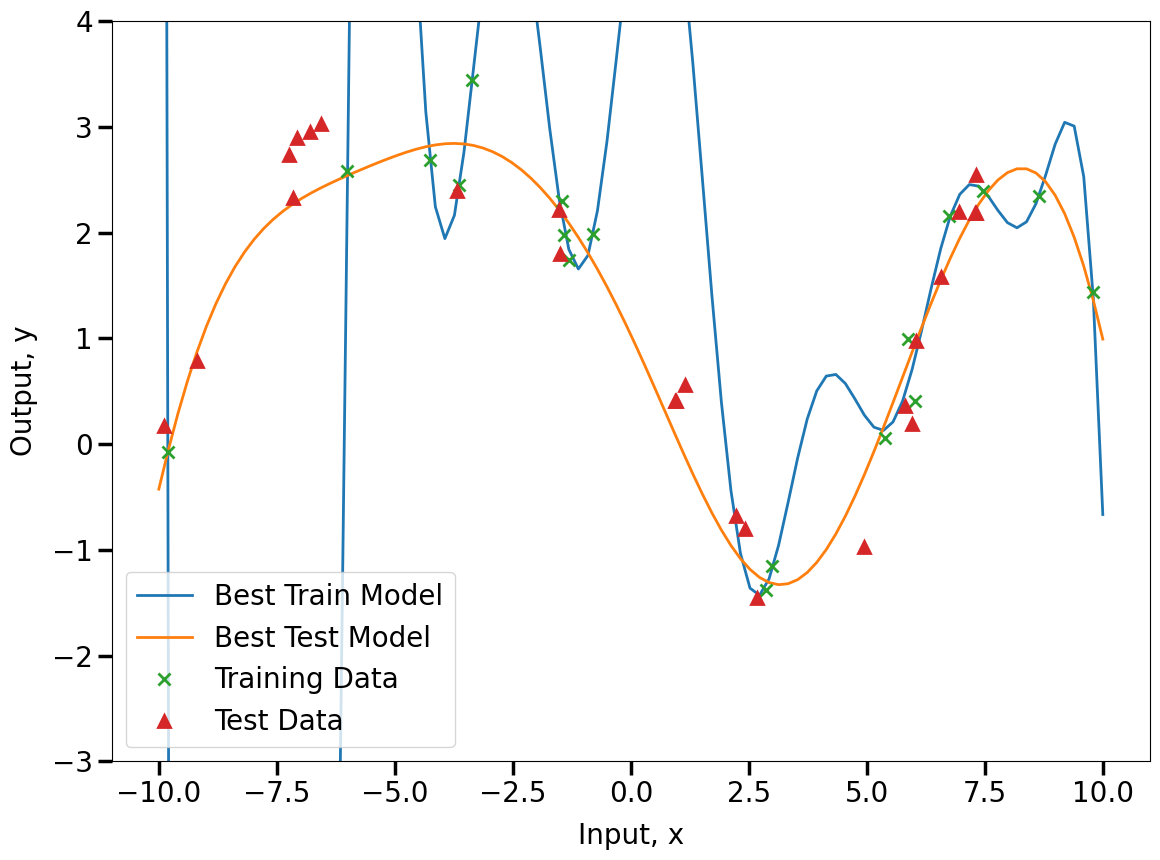

In [39]:
best_train_model = model_class(best_train_order)
_ = best_train_model.fit(x_train, y_train)

best_test_model = model_class(best_test_order)
_ = best_test_model.fit(x_train, y_train)


x_support = torch.linspace(-10., 10., 100).numpy()
plt.close('all')
plt.figure()
plt.plot(x_support, best_train_model.predict(x_support), label='Best Train Model')
plt.plot(x_support, best_test_model.predict(x_support), label='Best Test Model')
plt.plot(x_train, y_train, 'x', label='Training Data')
plt.plot(x_test, y_test, '^', label='Test Data')
plt.legend()
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.ylim([-3, 4])
plt.tight_layout()
plt.savefig(f"{str(best_train_model)}_approximated_systems.png", format="png")
plt.show()

In [32]:
from src.utils import array_to_md

In [40]:
array_to_md.array_to_md(np.array([np.arange(1, max_order + 1), train_mse_list, test_mse_list]).T)

| 1 | 1.762 | 1.83 |
| 2 | 1.683 | 2.111 |
| 3 | 1.669 | 2.047 |
| 4 | 1.656 | 2.142 |
| 5 | 0.164 | 0.351 |
| 6 | 0.557 | 0.883 |
| 7 | 0.097 | 0.287 |
| 8 | 0.078 | 0.157 |
| 9 | 0.072 | 0.183 |
| 10 | 0.069 | 0.158 |
| 11 | 0.062 | 0.33 |
| 12 | 0.059 | 0.939 |
| 13 | 0.057 | 10.294 |
| 14 | 0.022 | 1352.471 |
| 15 | 0.022 | 1355.318 |



### RBF

'RBFModel'